In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Breast_Cancer.csv')

# View the first few rows
print(df.head())


   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Remove the extra space before 'Survival Months'
X = df[['Age', 'Grade', 'Survival Months']]
y = df['Tumor Size']
# Create a LabelEncoder for the 'Grade' column
grade_encoder = LabelEncoder()

# Fit and transform the 'Grade' column in X
X['Grade'] = grade_encoder.fit_transform(X['Grade'])

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

<ipython-input-17-7cd9f4ee7557>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Grade'] = grade_encoder.fit_transform(X['Grade'])


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 604.0939958592132


In [20]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = knn.predict(X_test)

# Use appropriate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 604.0939958592132
R-squared: -0.19159128797078995


In [24]:
from sklearn.metrics import mean_squared_error

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 604.0939958592132


In [26]:
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k) # Changed from KNeighborsClassifier to KNeighborsRegressor
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test) # This will now calculate the R^2 score, suitable for regression
    print(f"k={k}, R-squared={score}")

k=1, R-squared=-0.8801091444355449
k=2, R-squared=-0.3263542432088191
k=3, R-squared=-0.19159128797078995
k=4, R-squared=-0.11595674810611145
k=5, R-squared=-0.0867563265411504
k=6, R-squared=-0.05070118145511793
k=7, R-squared=-0.0421324701357888
k=8, R-squared=-0.040326100713729884
k=9, R-squared=-0.04677775844958476
k=10, R-squared=-0.04207662131311696


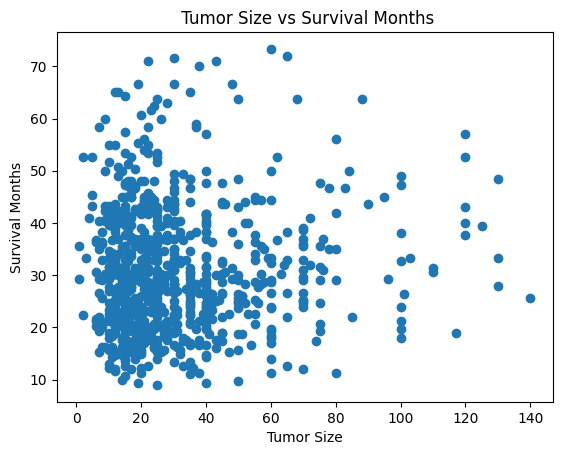

In [30]:
import matplotlib.pyplot as plt

# Instead of confusion matrix, visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Tumor Size")
plt.ylabel("Survival Months")
plt.title(" Tumor Size vs Survival Months")
plt.show()